- Exercici 1 

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    + Una variable categòrica (UniqueCarrier)
    + Una variable numèrica (ArrDelay)
    + Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    + Dues variables numèriques (ArrDelay i ArrDelay)
    + Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    + Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier). 

- Exercici 2 

Exporta els gràfics com imatges o com html.

- Exercici 3 

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

### Exercici 1 i 2

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

data = pd.read_csv('DelayedFlights.csv')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [83]:
#Crear sample del dataset amb només 10000 files per poder plotejar més ràpid
data_sample = data.sample(n = 10000, random_state=30)

In [84]:
data_sample.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1220167,4088548,2008,7,24,4,1544.0,1340,1827.0,1630,9E,5731,88779E,103.0,110.0,85.0,117.0,124.0,MEM,CHS,589,7.0,11.0,0,N,0,117.0,0.0,0.0,0.0,0.0
30641,93864,2008,1,31,4,1646.0,1610,1909.0,1825,WN,1525,N496WN,83.0,75.0,54.0,44.0,36.0,STL,CMH,410,3.0,26.0,0,N,0,15.0,0.0,8.0,0.0,21.0
241050,767455,2008,2,2,6,1655.0,1620,1734.0,1652,OO,5953,N953SW,99.0,92.0,76.0,42.0,35.0,ICT,DEN,419,10.0,13.0,0,N,0,42.0,0.0,0.0,0.0,0.0
1148777,3836008,2008,7,24,4,712.0,703,1548.0,1540,UA,162,N588UA,336.0,337.0,305.0,8.0,9.0,LAX,BOS,2611,6.0,25.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1615815,5885894,2008,10,30,4,1213.0,1155,1457.0,1420,AS,522,N627AS,164.0,145.0,140.0,37.0,18.0,SEA,BUR,937,6.0,18.0,0,N,0,18.0,0.0,19.0,0.0,0.0


In [85]:
data_sample['UniqueCarrier'].value_counts()

WN    1981
AA     988
UA     745
MQ     698
OO     698
DL     569
XE     543
CO     498
US     477
EV     462
NW     395
FL     363
YV     334
B6     287
OH     281
9E     248
AS     203
F9     178
HA      49
AQ       3
Name: UniqueCarrier, dtype: int64

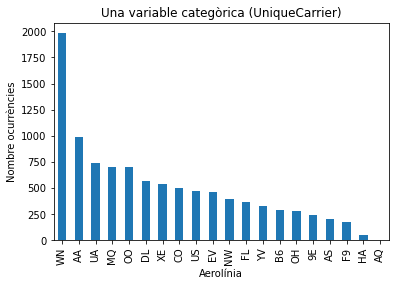

In [86]:
#Una variable categòrica (UniqueCarrier)
data_sample['UniqueCarrier'].value_counts().plot(kind='bar')
plt.title('Una variable categòrica (UniqueCarrier)')
plt.ylabel('Nombre ocurrències')
plt.xlabel('Aerolínia')
plt.savefig('fig1.png', transparent=True)
plt.show()

In [87]:
data_sample['ArrDelay'].describe()

count    9960.000000
mean       42.855422
std        58.268270
min       -46.000000
25%         9.000000
50%        25.000000
75%        57.000000
max      1344.000000
Name: ArrDelay, dtype: float64

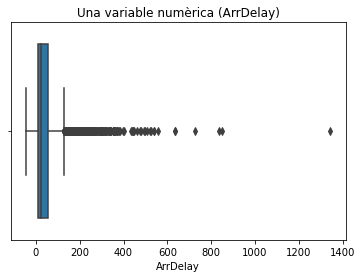

In [88]:
#Una variable numèrica (ArrDelay)
sns.boxplot(x=data_sample['ArrDelay'])
plt.title('Una variable numèrica (ArrDelay)')
plt.savefig('fig2.png', transparent=True)
plt.show()

In [89]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
order = data_sample.groupby(['UniqueCarrier']).mean()['ArrDelay'].sort_values(ascending=False).to_frame().reset_index()
order = order['UniqueCarrier'].tolist()

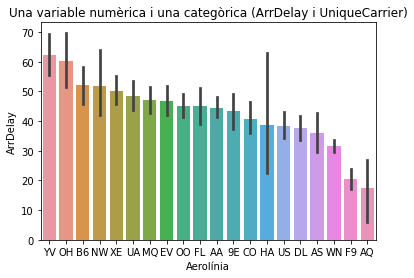

In [90]:
sns.barplot(y="ArrDelay", x="UniqueCarrier", order=order, data=data_sample)
plt.title('Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)')
plt.xlabel('Aerolínia')
plt.savefig('fig3.png', transparent=True)
plt.show()

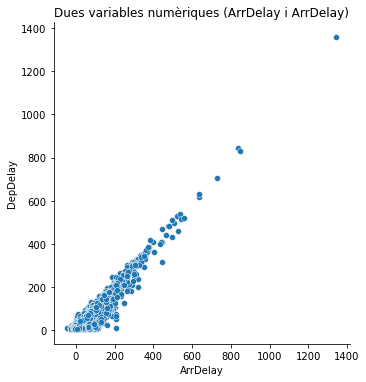

In [91]:
#Dues variables numèriques (ArrDelay i ArrDelay)
sns.relplot(x="ArrDelay", y="DepDelay", data=data_sample)
plt.title('Dues variables numèriques (ArrDelay i ArrDelay)')
plt.savefig('fig4.png', transparent=True)
plt.show()

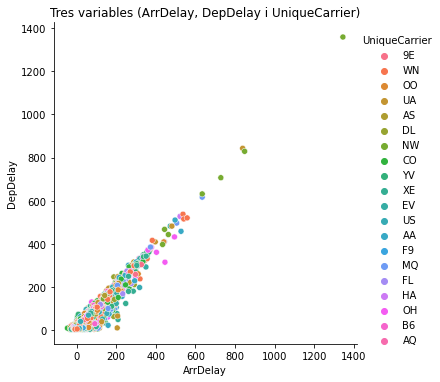

In [92]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)

sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", data=data_sample)
plt.title('Tres variables (ArrDelay, DepDelay i UniqueCarrier)')
plt.savefig('fig5.png', transparent=True)
plt.show()

                ArrDelay
UniqueCarrier           
YV             62.164671
OH             60.350000
B6             52.013986
NW             51.822335
XE             50.179963
                  AirTime
UniqueCarrier            
9E              75.028340
AA             146.417941
AQ              33.333333
AS             124.184080
B6             149.461538
                DepDelay
UniqueCarrier           
YV             62.919162
OH             58.839858
B6             52.006969
UA             50.524832
XE             48.598527
  index   ArrDelay     AirTime   DepDelay
0    YV  62.164671   63.964072  62.919162
1    OH  60.350000   79.428571  58.839858
2    B6  52.013986  149.461538  52.006969
3    NW  51.822335  111.200508  48.091139
4    XE  50.179963   90.256030  48.598527


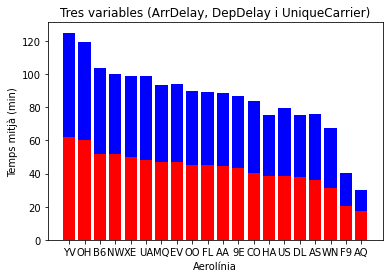

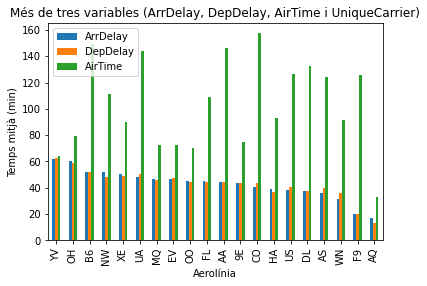

In [98]:


mean_ArrDelay = data_sample.groupby(['UniqueCarrier']).mean()['ArrDelay'].sort_values(ascending=False).to_frame()
print(mean_ArrDelay.head())
mean_AirTime = data_sample.groupby(['UniqueCarrier']).mean()['AirTime'].to_frame()
print(mean_AirTime.head())
mean_DepDelay = data_sample.groupby(['UniqueCarrier']).mean()['DepDelay'].sort_values(ascending=False).to_frame()
print(mean_DepDelay.head())

Arr_Air = pd.concat([mean_ArrDelay, mean_AirTime], axis=1)
Arr_Air_Dep = pd.concat([Arr_Air, mean_DepDelay], axis=1)
Arr_Air_Dep = Arr_Air_Dep.reset_index()
print(Arr_Air_Dep.head())

#Tres variables (ArrDelay, DepDelay i UniqueCarrier)
plt.bar(Arr_Air_Dep["index"], Arr_Air_Dep["ArrDelay"], color='r')
plt.bar(Arr_Air_Dep["index"], Arr_Air_Dep["DepDelay"], bottom=Arr_Air_Dep["ArrDelay"], color='b')
plt.title('Tres variables (ArrDelay, DepDelay i UniqueCarrier)')
plt.xlabel('Aerolínia')
plt.ylabel('Temps mitjà (min)')
plt.savefig('fig6.png', transparent=True)
plt.show()

#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
Arr_Air_Dep.plot(x="index", y=["ArrDelay", "DepDelay", "AirTime"], kind="bar")
plt.title('Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)')
plt.xlabel('Aerolínia')
plt.ylabel('Temps mitjà (min)')
plt.savefig('fig7.png', transparent=True)
plt.show()

